Problem Statement:Predict the next day closing stock price using historical stock market data.

# Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load Dataset

In [19]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Machine learning\stock_prices.csv")

df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace=True)




In [20]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.07,25.82,25.060,25.36,8998943
330,NVDA,2014-01-02,15.92,15.98,15.720,15.86,6502296
329,NUE,2014-01-02,53.29,53.38,52.510,52.73,1611326
328,NTRS,2014-01-02,61.76,61.95,60.665,60.89,1011050
327,NTAP,2014-01-02,41.01,41.01,40.415,40.42,2427140


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497461 non-null  float64       
 3   high    497464 non-null  float64       
 4   low     497464 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 30.4+ MB


# Data Cleaning

In [22]:
# Handle missing values
df.fillna(method="ffill", inplace=True)

# Drop Date column (not numeric)
df.drop("date", axis=1, inplace=True)


# Feature Engineering

In [23]:
# Moving Averages
df["MA_5"] = df["close"].rolling(window=5).mean()
df["MA_10"] = df["close"].rolling(window=10).mean()

# Price change
df["Daily_Return"] = df["close"].pct_change()

# Target variable (Next day close price)
df["Target"] = df["close"].shift(-1)

# Drop NaN values after feature creation
df.dropna(inplace=True)


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["symbol"] = le.fit_transform(df["symbol"])


# Feature & Target Split

In [31]:
X = df.drop("Target", axis=1)
y = df["Target"]

# Train-Test Split (Time Series Safe)

In [32]:
split = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


# Feature Scaling

In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train Linear Regression Model

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Model Prediction

In [35]:
y_pred = model.predict(X_test)


# Model Evaluation

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 16200.697477648015
R2 Score: -0.008668385544919222


# Visualization

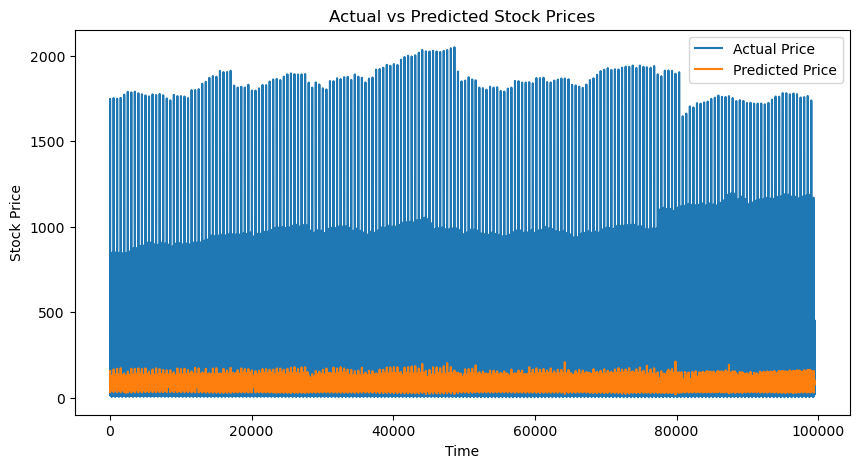

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()